# Setup

In [18]:
!pip install python-dotenv google-api-python-client

from google.colab import drive
drive.mount('/content/drive')

import os
from dotenv import load_dotenv
load_dotenv("/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/.envs/.env_github")
github_pat = os.getenv("GITHUB_PAT")
print(f"✅ GITHUB_PAT loaded successfully")
if not github_pat:
    raise ValueError("❌ Error: 'GITHUB_PAT' is missing or invalid in your .env file.")

!git clone https://{github_pat}@github.com/vmagdale2/Fraud-Detection.git

import sys
sys.path.append('/content/Fraud-Detection.git/')
%cd /content/Fraud-Detection/
!pwd
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ GITHUB_PAT loaded successfully
Cloning into 'Fraud-Detection'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 16.63 KiB | 1.19 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Fraud-Detection
/content/Fraud-Detection
Data  Fraud-Detection  LICENSE	README.md


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
import joblib

In [20]:
X_scaled = np.load('/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/Base/X_scaled_base.npy')
y = np.load('/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/Base/y_base.npy')


# Base

## PCA

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

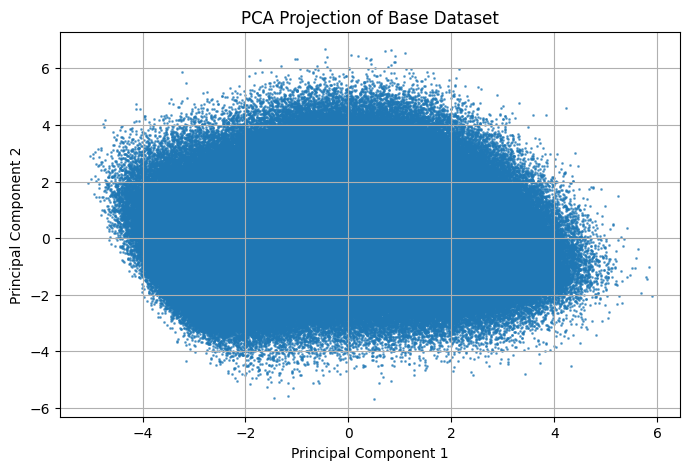

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=1, alpha=0.6)
plt.title("PCA Projection of Base Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

## Clustering

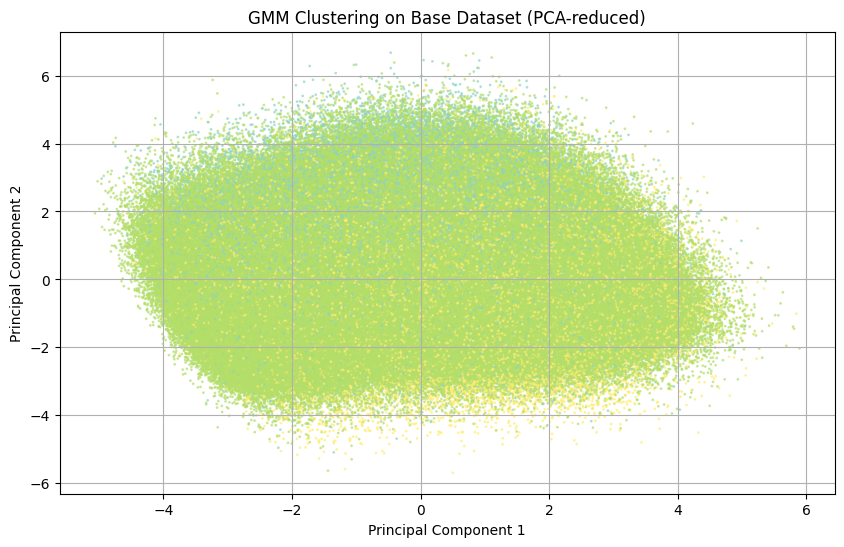

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

sample_indices = np.random.RandomState(seed=42).choice(X_pca.shape[0], size=20000, replace=False)
X_pca_sample = X_pca[sample_indices]
dbscan = DBSCAN(eps=1.3, min_samples=5)
dbscan_labels_sample = dbscan.fit_predict(X_pca_sample)

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='Set3', s=1, alpha=0.6)
plt.title("GMM Clustering on Base Dataset (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [24]:
def silhouette_sample_score(X, labels, model_name):
    try:
        mask = labels != -1
        X_valid = X[mask]
        labels_valid = np.array(labels)[mask]

        if len(np.unique(labels_valid)) < 2:
            raise ValueError("Only one cluster found")

        if len(X_valid) > 10000:
            X_valid, labels_valid = resample(X_valid, labels_valid, n_samples=10000, random_state=42)

        score = silhouette_score(X_valid, labels_valid)
        print(f"Silhouette Score ({model_name}): {score:.4f}")
    except ValueError as e:
        print(f"Silhouette Score ({model_name}): Cannot compute — {e}")

silhouette_sample_score(X_scaled, kmeans_labels, "K-Means (Base)")
silhouette_sample_score(X_pca_sample, dbscan_labels_sample, "DBSCAN (Base, Sampled PCA)")
silhouette_sample_score(X_scaled, gmm_labels, "GMM (Base)")

Silhouette Score (K-Means (Base)): 0.0701
Silhouette Score (DBSCAN (Base, Sampled PCA)): Cannot compute — Only one cluster found
Silhouette Score (GMM (Base)): 0.0768


In [25]:
np.save("/content/drive/My Drive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/Base/gmm_labels_base.npy", gmm_labels)

# Variant IV

## Setup

In [26]:
X_scaled = np.load('/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/Base/X_scaled_variantiv.npy')
y = np.load('/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/Base/y_variantiv.npy')

## PCA

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

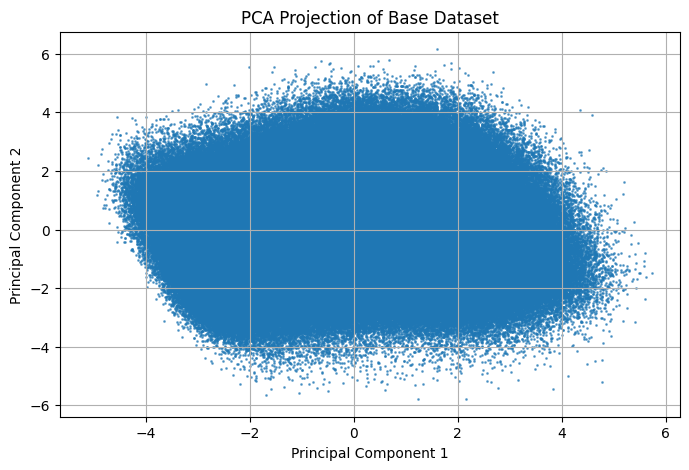

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=1, alpha=0.6)
plt.title("PCA Projection of Base Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

## Clustering

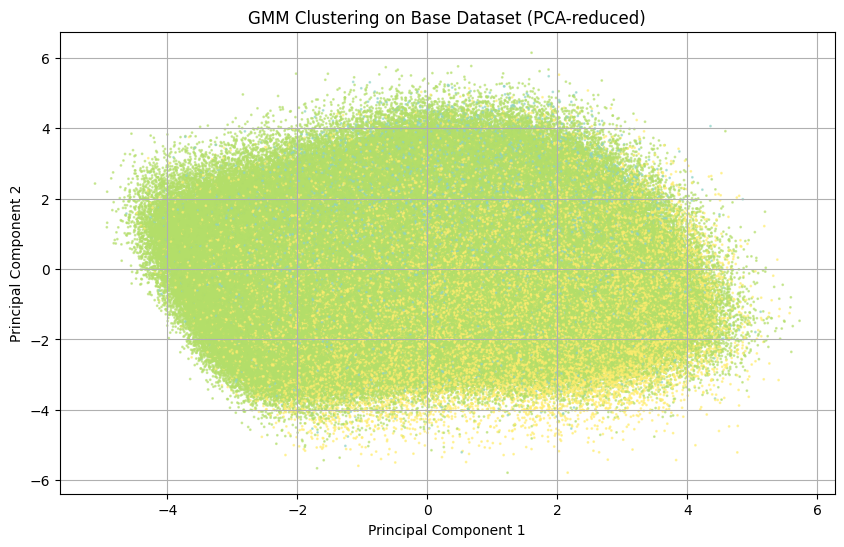

In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

sample_indices = np.random.RandomState(seed=42).choice(X_pca.shape[0], size=20000, replace=False)
X_pca_sample = X_pca[sample_indices]
dbscan = DBSCAN(eps=1.3, min_samples=5)
dbscan_labels_sample = dbscan.fit_predict(X_pca_sample)

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='Set3', s=1, alpha=0.6)
plt.title("GMM Clustering on Base Dataset (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [30]:
def silhouette_sample_score(X, labels, model_name):
    try:
        mask = labels != -1
        X_valid = X[mask]
        labels_valid = np.array(labels)[mask]

        if len(np.unique(labels_valid)) < 2:
            raise ValueError("Only one cluster found")

        if len(X_valid) > 10000:
            X_valid, labels_valid = resample(X_valid, labels_valid, n_samples=10000, random_state=42)

        score = silhouette_score(X_valid, labels_valid)
        print(f"Silhouette Score ({model_name}): {score:.4f}")
    except ValueError as e:
        print(f"Silhouette Score ({model_name}): Cannot compute — {e}")

silhouette_sample_score(X_scaled, kmeans_labels, "K-Means (Base)")
silhouette_sample_score(X_pca_sample, dbscan_labels_sample, "DBSCAN (Base, Sampled PCA)")
silhouette_sample_score(X_scaled, gmm_labels, "GMM (Base)")

Silhouette Score (K-Means (Base)): 0.0689
Silhouette Score (DBSCAN (Base, Sampled PCA)): Cannot compute — Only one cluster found
Silhouette Score (GMM (Base)): 0.0690


In [31]:
np.save("/content/drive/My Drive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/gmm_labels_variantiv.npy", gmm_labels)